# The first step in creating any machine learning model is to import the libraries that you are going to use

In [116]:
# Import Statements 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
%matplotlib inline

# This data set contains records related to red and white variants of the Portuguese Vinho Verde wine. It contains information from 1599 red wine samples and 4898 white wine samples. Input variables in the data set consist of the type of wine (either red or white wine) and metrics from objective tests (e.g. acidity levels, PH values, ABV, etc.), while the target/output variable is a numerical score based on sensory data.
# Attribute Information:
# •	type of wine: type of wine (categorical: 'red', "white")
# •	fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g / dm^3)
# •	volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g / dm^3)
# •	citric acid: Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g / dm^3)
# •	residual sugar: The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g / dm^3)
# •	chlorides: The amount of chloride salts (sodium chloride) present in the wine. (g / dm^3
# •	free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg / dm^3)
# •	total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg / dm^3)
# •	density: The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g / cm^3)
# •	pH: A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)
# •	sulphates: Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent.(g / dm3)
# •	alcohol: How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% by volume)
# Output variable:
# •	quality: score between 0 (very bad) and 10 (very excellent) by wine experts

# Next, we import the dataset using Pandas

In [117]:
#This code displays the first five rows of the dataset
cust_df = pd.read_csv("wine-quality-white-and-red.csv", delimiter=",")
cust_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# K-Means algorithm cannot use categorical features even if you convert them to numeric features 

In [118]:
# Drop the 'type' column from the DataFrame 'cust_df'
df = cust_df.drop('type', axis=1)

# Display the first few rows of the modified DataFrame
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# In this step, we normalize our dataset

In [119]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Extract features (excluding the first column) from the DataFrame 'df'
X = df.values[:, 1:]

# Replace any NaN values with zeros
X = np.nan_to_num(X)

# Standardize the features using StandardScaler
X = StandardScaler().fit_transform(X)

# Display the standardized features
X


array([[-0.42318303,  0.28468605,  3.20692903, ..., -0.54617826,
        -1.41855821,  0.20799905],
       [-0.24094936,  0.14704613, -0.80783726, ..., -0.27735097,
        -0.83161516,  0.20799905],
       [-0.36243847,  0.55996589,  0.30620784, ..., -0.61338508,
        -0.32852111,  0.20799905],
       ...,
       [ 1.03468634, -1.29817304, -0.66069923, ...,  1.47002637,
         0.42611996,  0.20799905],
       [ 1.85473786, -1.366993  , -0.72375839, ...,  1.20119908,
        -0.2446721 , -0.93722961],
       [-0.1802048 ,  1.04170561, -0.38744289, ...,  0.86516498,
         0.42611996,  0.20799905]])

# Setting up k-means
# Let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 3 (since we have 3 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

# Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [120]:
# Fit K-means model
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# Now let's fit the KMeans model with the feature matrix we created above, <b> X

In [121]:
# Fit K-means model
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

# Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> labels </b>.

In [122]:
# Get cluster labels
labels = k_means.labels_
print(labels)

[1 2 2 ... 0 0 0]


In [123]:
# Assign cluster labels to DataFrame
df["Clus_km"] = labels
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clus_km
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


# Centroids

In [124]:
print("Centroids:\n", k_means.cluster_centers_)

Centroids:
 [[ 1.17362995 -0.37923873 -0.59470841  0.90228927 -0.82605727 -1.1330634
   0.65609982  0.54814444  0.78038037 -0.16943267 -0.34709679]
 [-0.34603899  0.24976824  1.13704297 -0.10533103  0.81109218  0.94047209
   0.72216711 -0.38279689 -0.2689715  -0.80064436 -0.30196282]
 [-0.44554084  0.04935301 -0.43382566 -0.45275418 -0.07565747  0.01423701
  -0.87705995 -0.05639124 -0.26958642  0.64771743  0.40906363]]


# Silhouette Coefficent
The Silhouette Coefficient ranges from -1 (poor clustering) to 1 (well-separated clusters), with values near 0 indicating overlapping clusters

In [125]:
# Import the silhouette_score function from sklearn.metrics
from sklearn.metrics import silhouette_score

# Calculate the silhouette coefficient
silhouette_coef = silhouette_score(X, labels)

# Print the result
print(f"Silhouette Coefficient: {silhouette_coef:.2f}")


Silhouette Coefficient: 0.23


# Intra-cluster Distance
Intra-cluster distance measures the average distance between data points within the same cluster. 

In [126]:
# Calculate intra-cluster distances
intra_cluster_distances = []
for cluster_id in range(clusterNum):
    cluster_points = X[labels == cluster_id]
    centroid = k_means.cluster_centers_[cluster_id]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    intra_cluster_distances.append(distances.mean())

# Print intra-cluster distances
for cluster_id, distance in enumerate(intra_cluster_distances):
    print(f"Cluster {cluster_id}: Intra-cluster distance = {distance:.2f}")

Cluster 0: Intra-cluster distance = 2.85
Cluster 1: Intra-cluster distance = 2.38
Cluster 2: Intra-cluster distance = 2.33


# Inter-cluster Distance
Inter-cluster distance measures the average distance between centroids of different clusters. It reflects how well-separated the clusters are. 
The lower the inter-cluster distance (inertia), the better the separation between clusters

In [127]:
# Calculate the inter-cluster distances (inertia) using k-means
inter_cluster_distances = k_means.inertia_

# Print the result
print(f"Inter-cluster Distance (Inertia): {inter_cluster_distances:.2f}")


Inter-cluster Distance (Inertia): 46557.99


# Lets check the distribution of the output variable(quality)

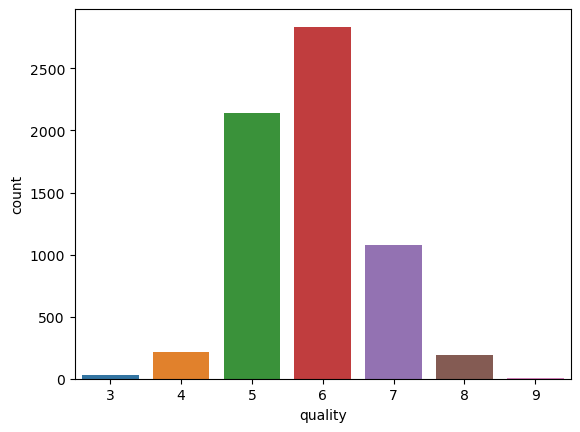

In [128]:
# Import seaborn library
import seaborn as sns

# Create a count plot for the 'quality' column in the dataframe 'df'
sns.countplot(x='quality', data=df)

# Display the plot
plt.show()


# Lets create a Histogram

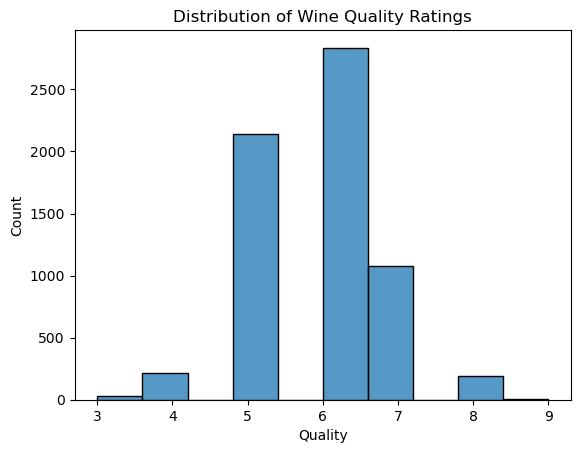

In [129]:
# Create a histogram plot for the 'quality' column in the dataframe 'df'
sns.histplot(data=df, x='quality', bins=10)

# Set the title, x-axis label, and y-axis label
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")

# Display the plot
plt.show()


# Heatmap

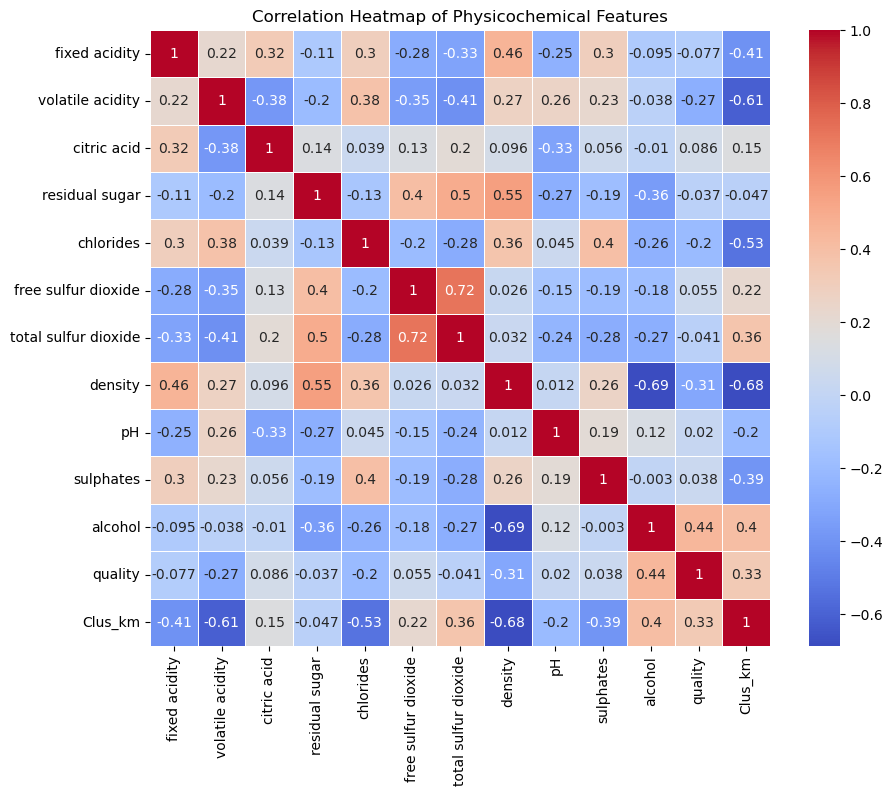

In [130]:
# Calculate the correlation matrix for the dataframe
correlation_matrix = df.corr()

# Create a new figure with a specified size
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations, using the 'coolwarm' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Physicochemical Features')

# Display the plot
plt.show()


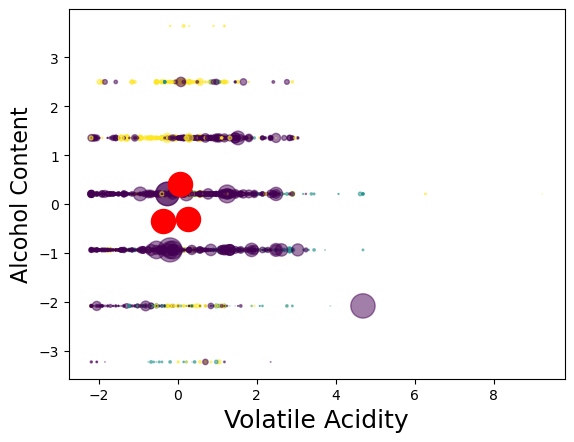

In [131]:
#Dear students, I modified the code since there was one error that needed to be corrected. This code shown below is the corrected code.

# Calculate the area based on the second column of the X array
area = np.pi * ( X[:, 8])**2
# Create a scatter plot
plt.scatter(X[:, 1], X[:, 10], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 10], s=300, c='red') # centroids
# Set X and Y labels
plt.xlabel('Volatile Acidity', fontsize=18)
plt.ylabel('Alcohol Content', fontsize=16)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


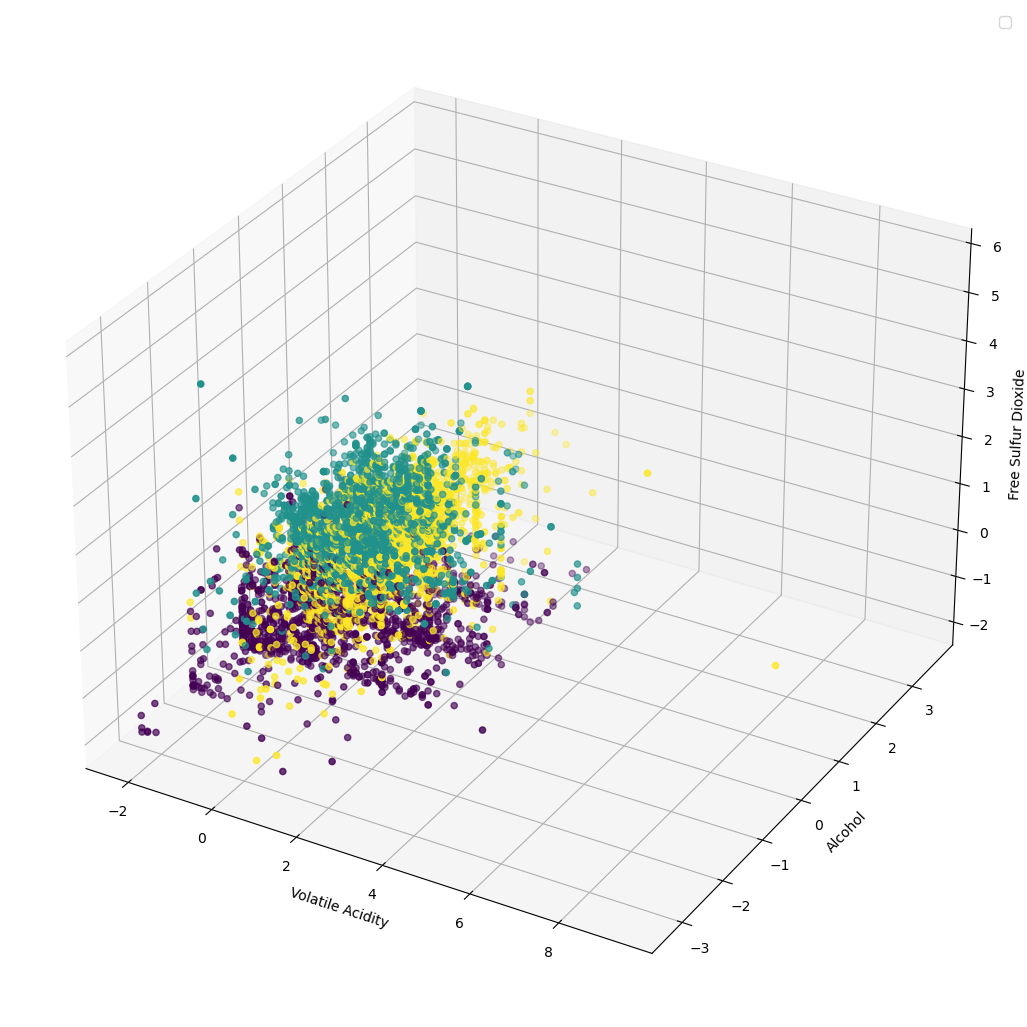

In [133]:
#Dear students, I modified the code since there were two errors that needed to be corrected. This code shown below is the corrected code.

# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a new figure with specified size
fig = plt.figure(1, figsize=(13, 16))
plt.clf()

# Create a 3D subplot
ax = plt.subplot(111, projection="3d")

# Clear the current axis
plt.cla()

# Set labels for the axes
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Free Sulfur Dioxide')

# Create a scatter plot using data from columns 1, 10, and 5 of the X array
ax.scatter(X[:, 1], X[:, 10], X[:, 5], c=labels.astype(np.float64))

# Display the plot
plt.show()
